In [25]:
import pandas as pd
import numpy as np
import geopandas as gpd
import geodatasets
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score


In [26]:
mental_health = pd.read_csv('survey.csv')
mental_health.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [27]:
mental_health.dropna(subset=['work_interfere'], inplace=True)
mental_health.info()
mental_health.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  995 non-null    object
 1   Age                        995 non-null    int64 
 2   Gender                     995 non-null    object
 3   Country                    995 non-null    object
 4   state                      602 non-null    object
 5   self_employed              977 non-null    object
 6   family_history             995 non-null    object
 7   treatment                  995 non-null    object
 8   work_interfere             995 non-null    object
 9   no_employees               995 non-null    object
 10  remote_work                995 non-null    object
 11  tech_company               995 non-null    object
 12  benefits                   995 non-null    object
 13  care_options               995 non-null    object
 14  wellness_progr

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        393
self_employed                 18
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
comments                     852
dtype: int64

In [28]:
cols_to_drop = ['Timestamp', 'comments', 'state', 'tech_company']
works_in_tech_encoded = mental_health.drop(columns=cols_to_drop)

### Performing Machine Learning without Preprocessing

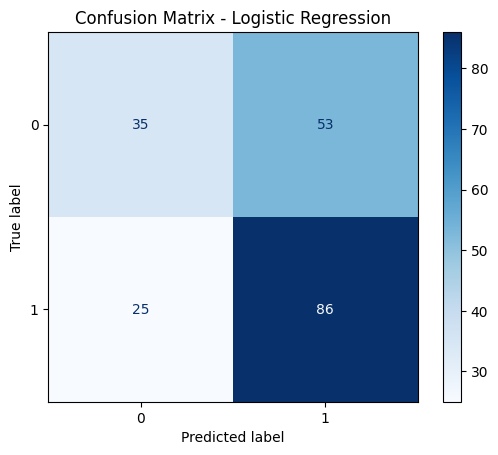

              precision    recall  f1-score   support

           0       0.58      0.40      0.47        88
           1       0.62      0.77      0.69       111

    accuracy                           0.61       199
   macro avg       0.60      0.59      0.58       199
weighted avg       0.60      0.61      0.59       199

Accuracy: 0.6080402010050251


In [29]:
# --- Features & Target ---
features = ['Age', 'Gender', 'family_history', 'leave', 'care_options', 'remote_work']
target = 'work_interfere'  # Yes / No

# X and y
X = pd.get_dummies(mental_health[features], drop_first=True)
y = mental_health[target].map({
    'Often': 1, 'Sometimes': 1,   # collapse into 1
    'Rarely': 0, 'Never': 0,       # collapse into 0
})

# for col in X.columns:
# 	X[col] = LabelEncoder().fit_transform(X[col])
# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Train Logistic Regression ---
model = LogisticRegression(max_iter=1000)  # increase iterations just in case
model.fit(X_train, y_train)

# --- Predictions ---
y_pred = model.predict(X_test)

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# --- Classification Report ---
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

### Machine Learning with Preprocessing

Categorical: ['Gender', 'family_history', 'leave', 'care_options', 'remote_work']
Numerical: ['Age']


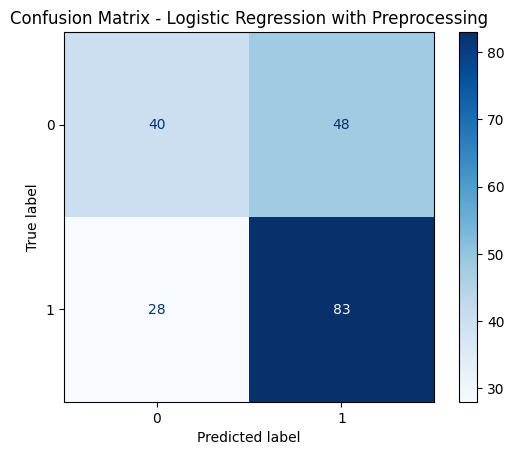

              precision    recall  f1-score   support

           0       0.59      0.45      0.51        88
           1       0.63      0.75      0.69       111

    accuracy                           0.62       199
   macro avg       0.61      0.60      0.60       199
weighted avg       0.61      0.62      0.61       199

Accuracy: 0.6180904522613065


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# --- Features & Target ---
features = ['Age', 'Gender', 'family_history', 'leave', 'care_options', 'remote_work']
target = 'work_interfere'  # Yes / No

X = mental_health[features].copy()
y = mental_health[target].map({
    'Often': 1, 'Sometimes': 1,
    'Rarely': 0, 'Never': 0,
})

# --- Train-test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- Automatically detect categorical and numerical features ---
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical:", categorical_features)
print("Numerical:", numeric_features)

# --- Preprocessing ---
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),   # handle missing Age
    ('scaler', StandardScaler())                   # scale numeric
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fill missing categories
    ('encoder', OneHotEncoder(handle_unknown='ignore'))    # one-hot encode categorical vars
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# --- Final pipeline with Logistic Regression ---
clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# --- Train ---
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# --- Evaluation ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression with Preprocessing")
plt.show()

print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
